# Atividade 2: Otimizadores 

O objetivo desta atividade é resolver o problema acima, usando os algoritmos de otimização
irrestrita visto em aula. O aluno deve entregar os códigos implementados e um relatório
comparando a convergência dos diferentes algoritmos.

In [1]:
import numpy as np   #Manipular Matrizes 
import pandas as pd  #Manipular TabelasBD
import random        #Gera numeros aleatorios 

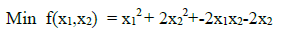

In [2]:
def Func_Poly(x1,x2):
    return x1**2 + 2*(x2**2) - 2*x1*x2 - 2*x2

-----------------
## Gradiente Descendente

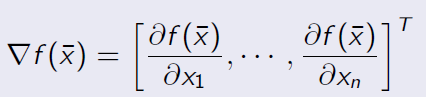

In [3]:
def grad(x1, x2):
    return np.array([2*x1 - 2*x2, 4*x2 -2*x1 -2])

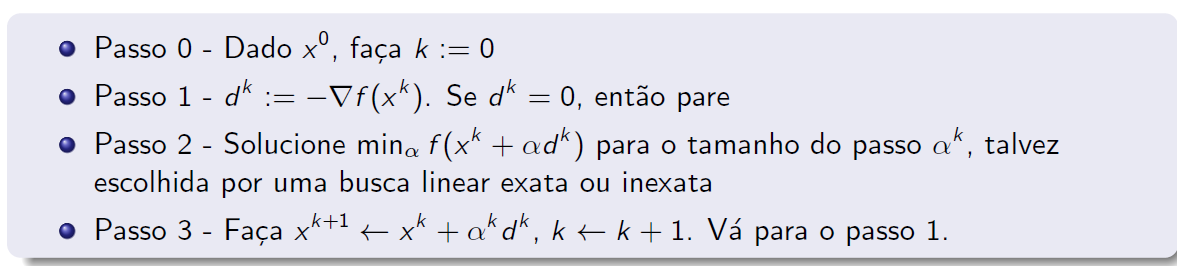

In [4]:
#Inicializando
alpha = 0.2
k = 0
interaction = 500
x = np.array([  random.randint(0, 10)  ,  random.randint(0, 10)  ])

In [5]:
#Gradiente Descendent
for k in range(0,interaction):
    x = x - alpha*grad(x[0],x[1])    
    print(x, k)
    if np.linalg.norm(grad(x[0],x[1])) < 1.0e-09:
        break 

[0.6 0.8] 0
[0.68 0.8 ] 1
[0.728 0.832] 2
[0.7696 0.8576] 3
[0.8048  0.87936] 4
[0.834624 0.897792] 5
[0.8598912 0.913408 ] 6
[0.88129792 0.92663808] 7
[0.89943398 0.93784678] 8
[0.9147991  0.94734295] 9
[0.92781664 0.95538823] 10
[0.93884528 0.9622043 ] 11
[0.94818889 0.96797897] 12
[0.95610492 0.97287135] 13
[0.96281149 0.97701624] 14
[0.96849339 0.98052784] 15
[0.97330717 0.98350293] 16
[0.97738547 0.98602345] 17
[0.98084067 0.98815888] 18
[0.98376795 0.98996804] 19
[0.98624799 0.99150079] 20
[0.98834911 0.99279935] 21
[0.99012921 0.99389951] 22
[0.99163733 0.99483159] 23
[0.99291503 0.99562125] 24
[0.99399752 0.99629026] 25
[0.99491462 0.99685706] 26
[0.99569159 0.99733726] 27
[0.99634986 0.99774409] 28
[0.99690755 0.99808876] 29
[0.99738004 0.99838077] 30
[0.99778033 0.99862817] 31
[0.99811947 0.99883777] 32
[0.99840679 0.99901534] 33
[0.99865021 0.99916578] 34
[0.99885644 0.99929324] 35
[0.99903116 0.99940122] 36
[0.99917918 0.99949271] 37
[0.99930459 0.99957022] 38
[0.99941084 0

In [6]:
#Abaixo temos o X que leva o Gradiente = 0, em 133 passos.
x

array([1., 1.])

--------------
## Método de Newton

Matriz Hessiana
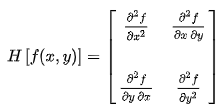

In [7]:
# Esta é a Hessiana da função F(x1,x2) apresenmtado acima.
H = np.array([[2,-2],[-2,4]]) 

Steps para implementar o metodo de newton 
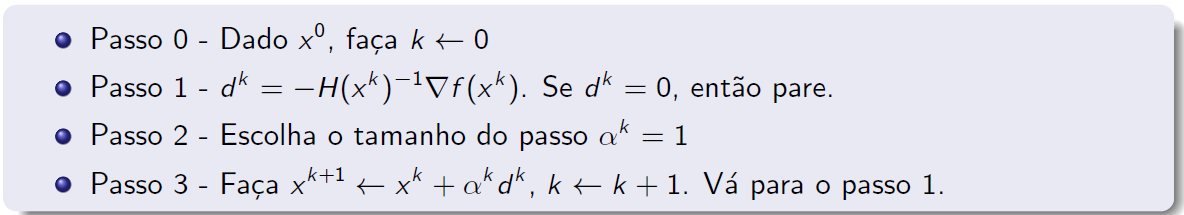

In [8]:
#Inicializando
alpha = 1
k = 0
interaction = 500
x = np.array([  random.randint(0, 10)  ,  random.randint(0, 10)  ])

In [9]:
#Metodo de Newton
for k in range(0,interaction):
    x = x - alpha*np.linalg.inv(H)@grad(x[0],x[1])    
    print(x, k)
    if np.linalg.norm(grad(x[0],x[1])) < 1.0e-09:
        break 

[1. 1.] 0


In [10]:
#Com Newton temos a solução em apenas um passo.
x

array([1., 1.])

--------------
## Método de Levenberg-Marquardt - LM

Retrabalhando a formula que temos que minizar, temos: \
$ r = (x_1 - x_2)^{2} + (x_2 - 1)^{2}           $

Com a equação acima, temos o precisamos para usar na formulação LM : \
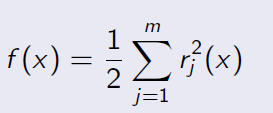

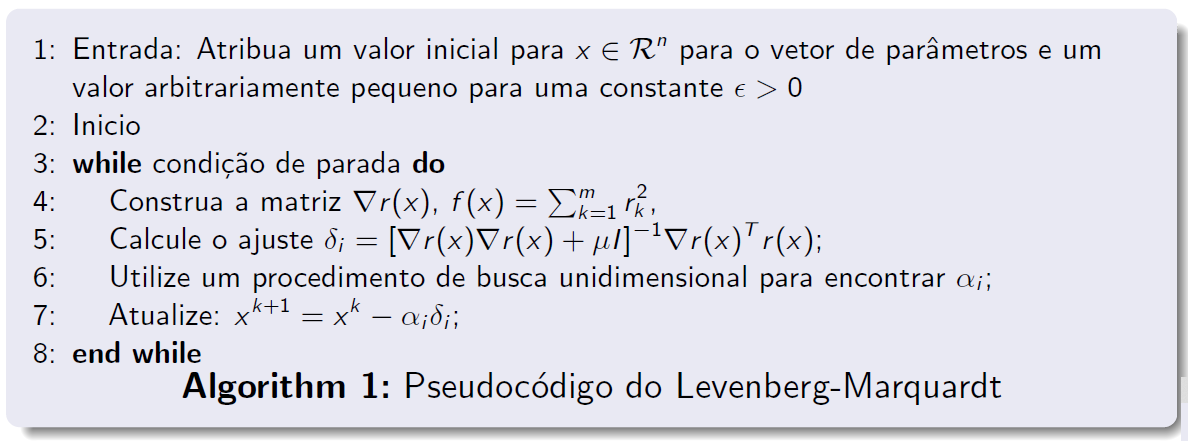

Assim obtemos o gradiente e a Hessiana em LM, e a lei de atualização:
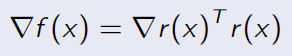

In [11]:
def grad(x1,x2):
    return np.array([x1-x2, 2*x2 -x1 - 1])

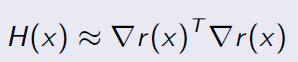

In [12]:
Hessiana = np.array([ [1,0],[-1,1] ]) @ np.array([[1,-1],[0,1]])

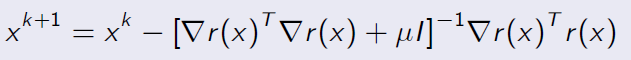

Os cálculos foram feitos em papel e caneta e serão enviados junto com o upload, então aqui irei direto ao ponto.

In [13]:
#Inicializando
alpha = 1
k = 0
interaction = 500
x = np.array([  random.randint(0, 10)  ,  random.randint(0, 10)  ])

In [14]:
#Metodo de LM
for k in range(0,interaction):
    x = x - alpha*np.linalg.inv(Hessiana + 0.00001) @ grad(x[0],x[1])    
    print(x, k)
    if np.linalg.norm(grad(x[0],x[1])) < 1.0e-09:
        break

[1. 1.] 0


In [15]:
# Não convergia com um passo, mas foi incrivelmente performatico com apenas três passos
x

array([1., 1.])

-----------------
## Método de Davidon-Fletcher-Powell - DFD

Referencias 01: https://www.researchgate.net/publication/325681854_Metodo_de_Davidon-Fletcher-Powell \
Referencias 02: ftp://ftp.dca.fee.unicamp.br/pub/docs/vonzuben/theses/lnunes_mest/cap3.pdf 

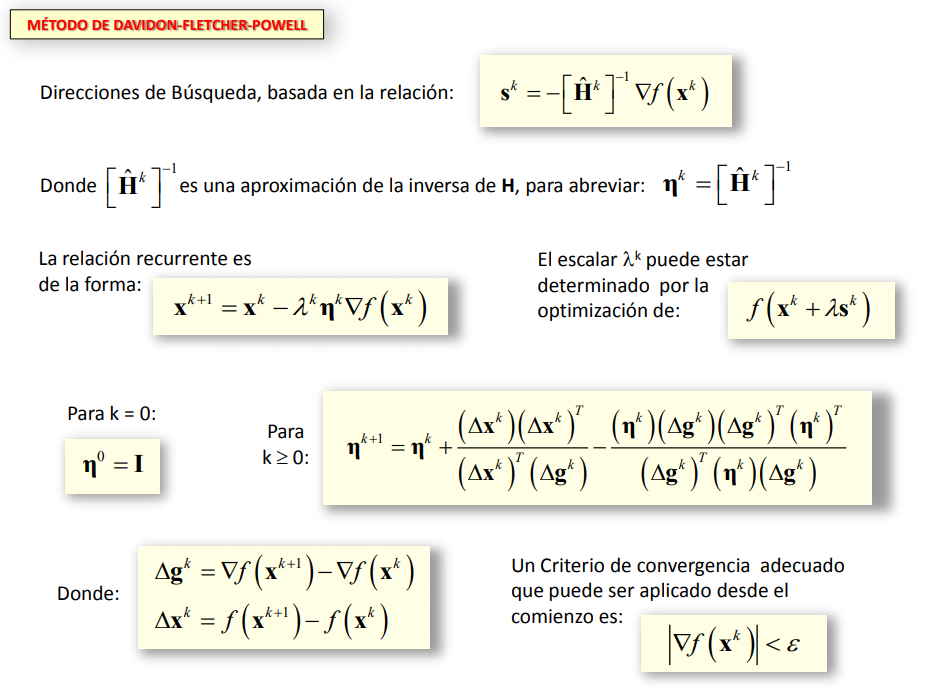

In [16]:
# Gradiente de F(x1,x2)
def grad(x1, x2):
    return np.array([2*x1 - 2*x2, 4*x2 -2*x1 -2])

In [139]:
x_new = np.array([  random.randint(0, 10)  ,  random.randint(0, 10)  ])
Identidade = np.identity(2) # Inicializando a Hessiana como uma matriz identidade
HessAprox = Identidade
interaction = 500
i = 0
alpha = 0.2

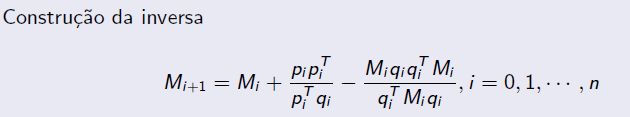

In [140]:
for i in range(0,interaction):
    x_old = x_new #Irei utilizar um ponto +
    x_new = x_new - alpha*HessAprox@grad(x_new[0],x_new[1]) #Lei de ajuste
    q = np.reshape( grad(x_new[0],x_new[1]) - grad(x_old[0],x_old[1]) , (2,1))
    p = np.reshape(x_new - x_old , (2,1) ) #Alpha*D
    #Na linha abaixo temos a "Construção da Inversa" pela DFP
    HessAprox = HessAprox + np.divide( p@p.T , p.T@q ) - np.divide(HessAprox@q@q.T@HessAprox , q.T@HessAprox@q)
    print(x_new, i )
    if np.linalg.norm(grad(x_new[0],x_new[1])) < 1.0e-05: #Criterio de parada, se gradiente =~ 0
        break

[8.8 5.6] 0
[7.57825503 4.92362416] 1
[5.98768209 4.03208552] 2
[4.75838831 3.33384077] 3
[3.81416209 2.7897613 ] 4
[3.09362365 2.36802111] 5
[2.54761205 2.04287601] 6
[2.13696743 1.79361211] 7
[1.83066499 1.60364904] 8
[1.60425725 1.45978205] 9
[1.4385828  1.35154623] 10
[1.31870307 1.27068687] 11
[1.23303261 1.21072111] 12
[1.17263313 1.16657765] 13
[1.13064618 1.13430352] 14
[1.101843   1.11082822] 15
[1.08227219 1.0937769 ] 16
[1.06898676 1.08132386] 17
[1.05983376 1.07207939] 18
[1.05329178 1.06500536] 19
[1.04834005 1.0593545 ] 20
[1.04434048 1.05462175] 21
[1.04092438 1.0504928 ] 22
[1.03789256 1.04678692] 23
[1.03514087 1.04340456] 24
[1.03261384 1.04028991] 25
[1.03027947 1.03740901] 26
[1.02811699 1.03473861] 27
[1.02611104 1.03226081] 28
[1.02424912 1.02996059] 29
[1.02252036 1.02782476] 30
[1.02091502 1.02584135] 31
[1.01942419 1.02399939] 32
[1.01803966 1.02228875] 33
[1.01675383 1.02070006] 34
[1.01555966 1.01922462] 35
[1.01445061 1.01785434] 36
[1.01342061 1.01658173] 3

In [127]:
#Valor de convergencia e a quantidade interações
x_new, i

(array([1.00000477, 1.00000483]), 105)

-----------------
## Método de Broyden-Fletcher-Goldfarb-Shanno (BFGS)

In [38]:
# Gradiente de F(x1,x2)
def grad(x1, x2):
    return np.array([2*x1 - 2*x2, 4*x2 -2*x1 -2])

In [181]:
x_new = np.array([  random.randint(0, 10)  ,  random.randint(0, 10)  ])
HessAprox = np.identity(2) # Inicializando a Hessiana como uma matriz identidade
interaction = 500
i = 0
alpha = 0.2

Construção da Hessiana via BFGS
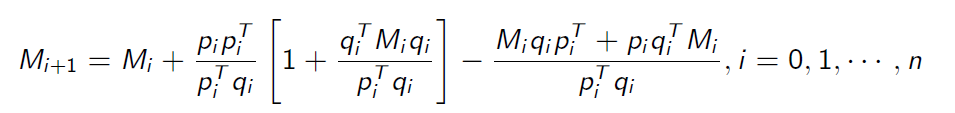

In [182]:
for i in range(0,interaction):
    x_old = x_new #Irei utilizar um ponto +
    x_new = x_new - alpha*HessAprox@grad(x_new[0],x_new[1]) #Lei de ajuste
    q = np.reshape( grad(x_new[0],x_new[1]) - grad(x_old[0],x_old[1]) , (2,1))
    p = np.reshape(x_new - x_old , (2,1) ) #Alpha*D
    #Na linha abaixo temos a "Construção da Inversa" pela BFGS
    HessAprox = HessAprox + np.multiply( np.divide( p@p.T , p.T@q ) ,  1 + np.divide( q.T@HessAprox@q , p.T@q ) ) - np.divide( HessAprox@q@p.T + p@q.T@HessAprox , p.T@q )
    print(x_new, i )
    if np.linalg.norm(grad(x_new[0],x_new[1])) < 1.0e-05: #Criterio de parada, se gradiente =~ 0
        break

[4.2 3. ] 0
[3.16 2.2 ] 1
[2.7216369  1.96272704] 2
[2.3773797  1.76979162] 3
[2.10189667 1.61585906] 4
[1.88151781 1.49268546] 5
[1.70521422 1.39414849] 6
[1.56417138 1.31531878] 7
[1.4513371  1.25225503] 8
[1.36106968 1.20180402] 9
[1.28885574 1.16144322] 10
[1.2310846  1.12915457] 11
[1.18486768 1.10332366] 12
[1.14789414 1.08265893] 13
[1.11831531 1.06612714] 14
[1.09465225 1.05290171] 15
[1.0757218  1.04232137] 16
[1.06057744 1.0338571 ] 17
[1.04846195 1.02708568] 18
[1.03876956 1.02166854] 19
[1.03101565 1.01733483] 20
[1.02481252 1.01386787] 21
[1.01985002 1.01109429] 22
[1.01588001 1.00887543] 23
[1.01270401 1.00710035] 24
[1.01016321 1.00568028] 25
[1.00813057 1.00454422] 26
[1.00650445 1.00363538] 27
[1.00520356 1.0029083 ] 28
[1.00416285 1.00232664] 29
[1.00333028 1.00186131] 30
[1.00266422 1.00148905] 31
[1.00213138 1.00119124] 32
[1.0017051  1.00095299] 33
[1.00136408 1.00076239] 34
[1.00109127 1.00060992] 35
[1.00087301 1.00048793] 36
[1.00069841 1.00039035] 37
[1.0005587

In [183]:
#Valor de convergencia e a quantidade interações
x_new, i

(array([1.00001007, 1.00000563]), 56)

-----------------
## Método das Secantes de um Passo (OSS - One Step Secante)